## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = x[3601]
some_digit_image = some_digit.reshape(28, 28) # lets reshape it to plot it

(-0.5, 27.5, 27.5, -0.5)

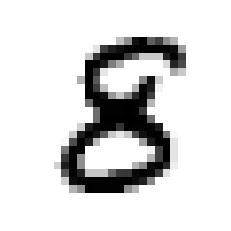

In [9]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [10]:
y[3601]

'8'

In [11]:
x_train, x_test = x[0:6000], x[6000:7000]

In [12]:
y_train, y_test = y[0:6000], y[6000:7000]

In [13]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 detector

In [14]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [15]:
y_train

array([2, 0, 7, ..., 1, 9, 5], dtype=int8)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression(tol = 0.1, solver='lbfgs')

In [18]:
clf.fit(x_train, y_train_2)

c:\users\opmis\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [19]:
clf.predict([some_digit])

array([False])

In [20]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

c:\users\opmis\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\opmis\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [21]:
a.mean()

0.9563333333333333

## Quiz

In [22]:
# Create a classifier which will classify a digit always as "not 2"
# 90% --> not 2

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_predictions = cross_val_predict(clf, x_train, y_train_2, cv=3)

c:\users\opmis\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\opmis\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [24]:
y_train_predictions

array([ True, False, False, ..., False, False, False])

## Calculating Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix  

In [26]:
confusion_matrix(y_train_2, y_train_2)

array([[5419,    0],
       [   0,  581]], dtype=int64)

## Precision ans Recall

In [27]:
from sklearn.metrics import precision_score, recall_score

In [28]:
recall_score(y_train_2, y_train_predictions)

0.8055077452667814

In [29]:
from sklearn.metrics import f1_score 

In [31]:
f1_score(y_train_2, y_train_predictions)

0.7813021702838063

## Precision Recall Curve

In [32]:
from sklearn.metrics import precision_recall_curve

In [41]:
y_scores = cross_val_predict(clf, x_train, y_train, cv=3, method='decision_function')

c:\users\opmis\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\opmis\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [34]:
precision, recall, thresholds = precision_recall_curve(y_train_2, y_train_predictions)

In [35]:
precision

array([0.09683333, 0.75850891, 1.        ])

In [36]:
recall

array([1.        , 0.80550775, 0.        ])

In [38]:
thresholds

array([False,  True])

In [42]:
y_scores

array([[ -32.6588677 ,  -53.59013598,  131.10228949, ..., -133.43053054,
          28.87806326,    0.33406506],
       [  23.23636598,   -8.27239656,  -51.39681612, ...,   14.33924276,
          -0.27721687,   36.08823086],
       [ -19.25661156,  -33.73924136,    8.79243354, ...,   88.76497355,
          26.58321651,    1.26247763],
       ...,
       [ -60.87259448,   72.7923541 ,   33.02308212, ...,   10.93250471,
          26.27477129,    1.54871337],
       [ -41.18172587,  -25.3614773 ,   -8.65603578, ...,   36.60684353,
          21.85218016,   75.49579747],
       [  35.53526737,  -21.73031612,   24.5474995 , ...,  -22.25507544,
          25.46537114,  -18.01586924]])

## Plotting the Precision Recall Curve

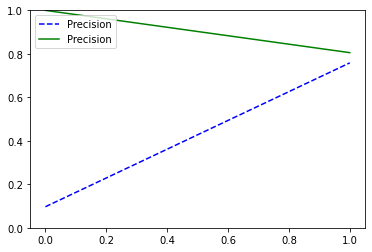

In [48]:
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Precision')
plt.xlabel =('Threshold')
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()